In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('house/train.csv')
test = pd.read_csv('house/test.csv')

# Combine train and test

In [9]:
all_data = pd.concat((data.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
#creating matrices for sklearn:
X_train_1 = all_data[:data.shape[0]]
X_test_1 = all_data[data.shape[0]:]
y_1 = data.SalePrice


# Draw Histogram

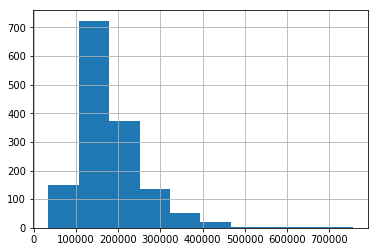

In [45]:
data['SalePrice'].hist()

# Normalize data

In [46]:
data['SalePrice'] = np.log1p(data['SalePrice'])

numeric_feats = data.dtypes[data.dtypes!='object'].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats>0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,12.247699
1,2,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,12.109016
2,3,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,12.317171
3,4,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,11.849405
4,5,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,12.429220


# Dummies and FillNa with mean

In [150]:
data = pd.get_dummies(data)
data = data.fillna(data.mean())


## Correlation Analysis

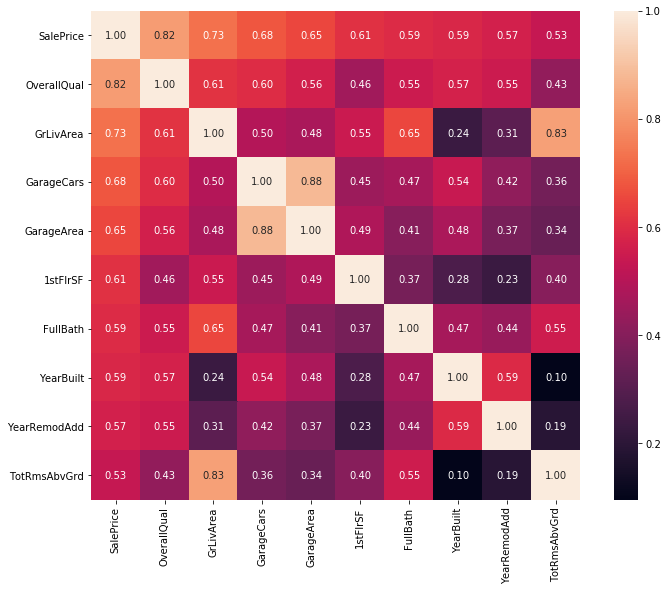

In [48]:
correlations = data.corr()
k = 10
cols = correlations.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# Model

In [81]:
train,test=train_test_split(data,test_size=0.3,random_state=0)
train_Y=train[['SalePrice']]
train = train.drop(['SalePrice'], axis = 1)
train_X=train[train.columns[:]]
test_Y=test[['SalePrice']]
test = test.drop(['SalePrice'], axis=1)
test_X=test[test.columns[:]]

## Ridge Model

In [101]:
model = Ridge(alpha=15, fit_intercept=False)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('Accuracy for rbf Ridle is ',metrics.mean_squared_error(prediction,test_Y))

Accuracy for rbf SVM is  0.01920962975231873


## LassoCV Model

In [121]:
model = LassoCV(alphas=[.001, 0.001, 0.001, 0.001])
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('Accuracy for rbf LassoCV is ',metrics.mean_squared_error(prediction,test_Y))

Accuracy for rbf Ridle is  0.01802990188207278


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## RandomForest Regressor

In [128]:
model = RandomForestRegressor(n_estimators=200, max_depth=20)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('Accuracy for rbf LassoCV is ',metrics.mean_squared_error(prediction,test_Y))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for rbf LassoCV is  0.01782019739085191


# Predict

In [139]:
test = pd.read_csv('house/test.csv')
test[skewed_feats] = np.log1p(data[skewed_feats])
test = pd.get_dummies(test)
test = test.fillna(test.mean())

In [140]:
final_result = model.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 289 and input n_features is 271 